### Backtesting and Strategy Performance

In [1]:
import numpy as np # array operations
import pandas as pd #time series management
from pandas_datareader import data as web  # data retrieval
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [7]:
ko = web.DataReader('KO', data_source= 'yahoo')
ko.take([121]) # get the specific row

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-25,25.895,25.965,25.129999,25.129999,18.757433,57969600


In [8]:
ko[['Adj Close','Close']].head()

,Adj Close,Close
Date,,
2009-12-31,20.576349,28.500000
2010-01-04,20.590782,28.520000
2010-01-05,20.341705,28.174999
2010-01-06,20.334488,28.165001
2010-01-07,20.283949,28.094999


In [9]:
ko.loc['2011-04-11'] # single row via index value

Open         3.363000e+01
High         3.392000e+01
Low          3.340000e+01
Close        3.370000e+01
Adj Close    2.627193e+01
Volume       1.466400e+07
Name: 2011-04-11 00:00:00, dtype: float64

In [10]:
ko.iloc[:2] # two rows via index numbers

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,28.790001,28.875000,28.465000,28.50,20.576349,10848800
2010-01-04,28.580000,28.610001,28.450001,28.52,20.590782,13870400


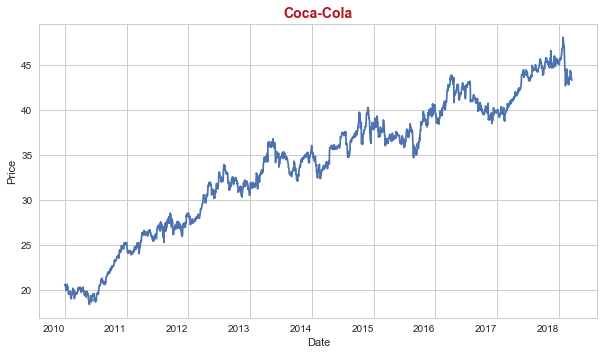

In [19]:
sns.set_style('whitegrid')
ko['Adj Close'].plot(figsize = (10,6))
plt.title('Coca-Cola', size = 14, weight = 'bold', color = '#b5121f')
plt.ylabel('Price')
plt.xticks(rotation = 0)
plt.show()

Coca Cola stock price **log returns**

In [20]:
ret= np.log(ko['Adj Close'] / ko['Adj Close'].shift(1))

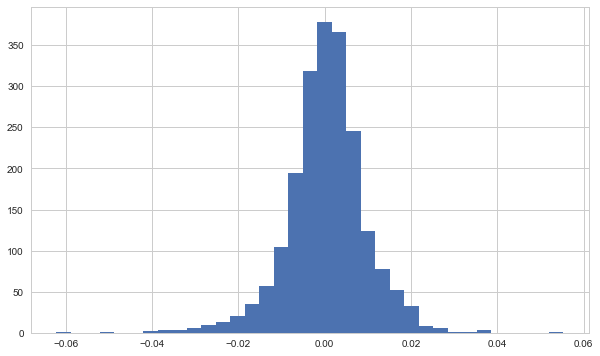

In [21]:
ret.hist(figsize = (10, 6 ), bins = 35);

** Moving Averages **

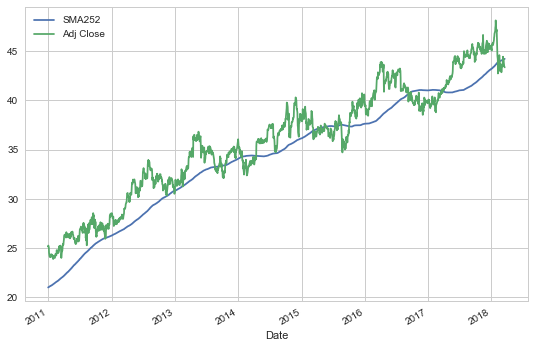

In [22]:
ko['SMA252'] = ko['Adj Close'].rolling(window = 252).mean()
ko.dropna(inplace = True)
ko[['SMA252','Adj Close']].plot(figsize = (9,6));

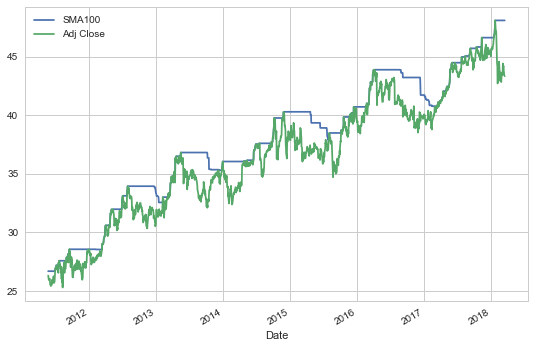

In [23]:
ko['SMA100'] = ko['Adj Close'].rolling(window = 100).max()
ko.dropna(inplace = True)
ko[['SMA100','Adj Close']].plot(figsize = (9,6));

### Retrieving index Level Data

In [24]:
aex = web.DataReader('^AEX', data_source='yahoo', start =  '2007-3-15')
aex.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-13,538.530029,539.530029,530.520020,532.520020,532.520020,81458300
2018-03-14,531.229980,534.640015,529.890015,530.969971,530.969971,81665000
2018-03-15,532.929993,534.289978,530.770020,533.299988,533.299988,78266700
2018-03-16,533.530029,537.820007,533.359985,536.919983,536.919983,186242000
2018-03-19,536.289978,536.760010,530.309998,531.520020,531.520020,0


In [25]:
aex['SMA252'] = aex['Adj Close'].rolling(window = 252).mean()
aex['SMA100'] = aex['Adj Close'].rolling(window = 100).mean()

In [26]:
#vectorized evalulation of the trading condition signal generation
aex['position'] = np.where(aex['SMA100'] > aex['SMA252'],1,-1)  # 1 is long the market, -1 short the market

(-1.1, 1.1)

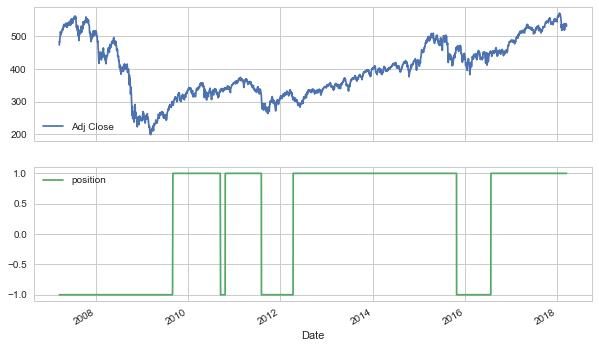

In [27]:
aex[ ['Adj Close','position'] ].plot(subplots = True, figsize = (10,6))
plt.ylim(-1.1,1.1) #adjust y-axis limits

In [28]:
#vectorized calculation of log returns
aex['Market']= np.log(aex['Adj Close'] / aex['Adj Close'].shift(1))

In [29]:
# vectorized calculation of strategy returns
aex['strategy'] = aex['position'].shift(1) * aex['Market']

### Strategy Evaluation Performance

In [30]:
#vectorized calculation of log returns
aex['Market']= np.log(aex['Adj Close'] / aex['Adj Close'].shift(1))

In [31]:
#vectorized calculation of strategy returns
aex['strategy'] = aex['position'].shift(1) * aex['Market']

In [32]:
aex[[ 'Market','strategy'] ].cumsum().apply(np.exp).tail()

,Market,strategy
Date,,
2018-03-13,1.124931,3.013675
2018-03-14,1.121657,3.004903
2018-03-15,1.126579,3.018089
2018-03-16,1.134226,3.038576
2018-03-19,1.122819,3.008016


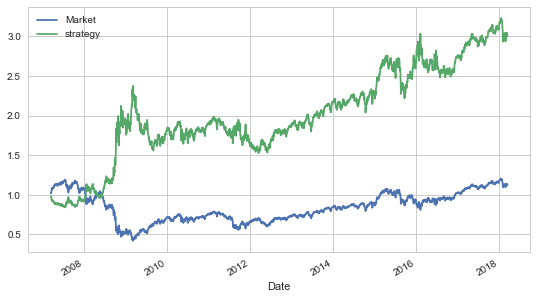

In [33]:
aex[ ['Market','strategy'] ].cumsum().apply(np.exp).plot(figsize = (9,5));

### Risk and Return

In [34]:
annual_return = aex[['Market','strategy']].mean() * 252 #annualized returns
annual_return

Market      0.010363
strategy    0.098517
dtype: float64

### Retrieve basket of stocks

In [39]:
symbols = ['PFE','GE','BA','VZ','CAT']

data_ = pd.DataFrame()

for sym in symbols:
    data_[sym] = web.DataReader(sym, data_source= 'yahoo')['Adj Close']

In [41]:
data_.head()

,PFE,GE,BA,VZ,CAT
Date,,,,,
2009-12-31,13.395256,11.531903,44.043266,20.772409,45.339199
2010-01-04,13.940195,11.775805,45.711254,20.866457,46.580276
2010-01-05,13.741364,11.836779,47.208397,20.904076,47.137184
2010-01-06,13.697187,11.775805,48.640427,20.322453,47.280373
2010-01-07,13.645636,12.385554,50.609486,20.201487,47.471310


** normalization ** the data starting at 100

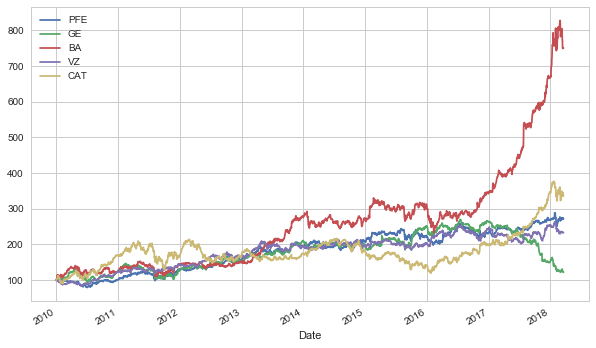

In [43]:
(data_ / data_.ix[0] * 100).plot(figsize = (10, 6));

In [44]:
log_return = np.log(data_ / data_.shift(1))

In [45]:
#annualized average log returns
rets = log_return.mean() * 252
rets

PFE    0.121800
GE     0.024004
BA     0.245836
VZ     0.103276
CAT    0.147686
dtype: float64

In [46]:
weights = np.array([0.2, 0.2, 0.2, 0.2,0.2]) #equal weightings
np.dot(weights, rets) # portfolio return equal weights

0.12852035847820928

In [47]:
log_return.cov() * 252  # annual covariance matrix

,PFE,GE,BA,VZ,CAT
PFE,0.033173,0.019827,0.018540,0.011872,0.019744
GE,0.019827,0.048654,0.027984,0.016410,0.033465
BA,0.018540,0.027984,0.056078,0.013866,0.034047
VZ,0.011872,0.016410,0.013866,0.027099,0.016086
CAT,0.019744,0.033465,0.034047,0.016086,0.070810


In [48]:
# portfolio variance
pvar = np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
pvar

0.026379869425633647

** The portfolio volatility **

In [49]:
pvol = pvar * 0.5
pvol

0.013189934712816823

In [51]:
#annualized average log returns
mu = log_return.mean() * 252
mu

PFE    0.121800
GE     0.024004
BA     0.245836
VZ     0.103276
CAT    0.147686
dtype: float64

In [52]:
# annualized volatility
sigma = log_return.std() * 252 ** 0.5
sigma

PFE    0.182134
GE     0.220577
BA     0.236809
VZ     0.164618
CAT    0.266102
dtype: float64